# Regression

##  Linear Regression

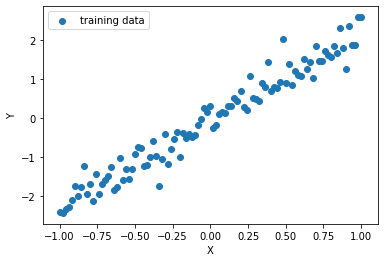

In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt

# generate some training data
x_train=np.linspace(-1,1,101)
y_train=2.3*x_train+np.random.randn(*x_train.shape)*0.3 # * is for unpacking

# plot training data
plt.scatter(x_train,y_train,label="training data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [2]:
# parameters
training_epochs = 200
learning_rate = 0.01

In [3]:
# define model function
def linearReg(X,w):
    return tf.multiply(X,w)

In [4]:
# define placeholders, variables
X = tf.placeholder("float")
Y = tf.placeholder("float")
w = tf.Variable(1.0, name="weight")

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
# define cost function
y_pred=linearReg(X,w)
cost=tf.reduce_mean(tf.pow(Y-y_pred,2))

In [6]:
# add summary to view on tensorboard (create the logs dir!)
weight_summary = tf.summary.scalar("weight summary", w)
writer = tf.summary.FileWriter("./logs/linear")

INFO:tensorflow:Summary name weight summary is illegal; using weight_summary instead.


In [7]:
# choose training op
trainer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use tf.cast instead.


In [8]:
# run session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())  # initialize variables
    
    for _ in range(training_epochs):
        for x,y in zip(x_train, y_train):
            summary_str, meh = sess.run([weight_summary, trainer],feed_dict={X:x,Y:y})
            sess.run(w)
            writer.add_summary(summary_str, _)
    w_val=sess.run(w)
    y_model=sess.run(linearReg(x_train,sess.run(w)))
    writer.add_graph(sess.graph)
    writer.close()
    sess.close()


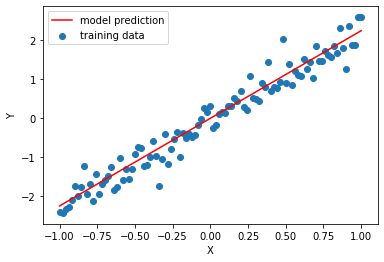

In [9]:
plt.scatter(x_train, y_train,label="training data")
plt.plot(x_train,y_model,'r',label="model prediction")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Polynomial Regression

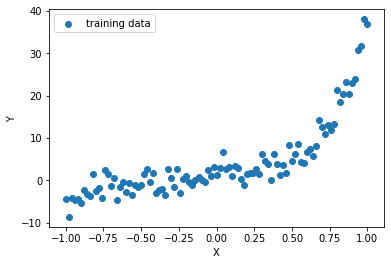

In [10]:
# generate some training data
x_train=np.linspace(-1,1,101)
num_coeff = 8
learning_rate = 0.01
training_epochs = 100
y_train_coeff = np.array([1, 3, 2, 6, 9, 8, 4, 5])

y_kernel = []
for i in range(num_coeff):
    term = np.power(x_train,i)
    y_kernel.append(term)
y_train = np.dot(y_train_coeff, y_kernel) + np.random.randn(*x_train.shape)*2    

# plot training data
plt.scatter(x_train,y_train,label="training data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [11]:
# define polynomial model
def polyReg(X,w):
    y_kernel = []
    for i in range(num_coeff):
        term = tf.multiply(w[i],tf.pow(X,i))
        y_kernel.append(term)
    return tf.add_n(y_kernel)

In [12]:
# define placeholders, variables
X = tf.placeholder(tf.float64)
Y = tf.placeholder(tf.float64)
w = tf.Variable([0.]*num_coeff, name="weights", dtype=tf.float64)

In [13]:
# model tf object and cost function
y_pred=polyReg(X,w)
cost=tf.reduce_mean(tf.pow(Y-y_pred,2))

In [14]:
# add summary to view on tensorboard (create the logs dir!)
weight_summary = tf.summary.tensor_summary("weight summary", w)
writer = tf.summary.FileWriter("./logs/poly")

INFO:tensorflow:Summary name weight summary is illegal; using weight_summary instead.


In [15]:
# choose training op
trainer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [16]:
# run session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())  # initialize variables
    
    for _ in range(training_epochs):
        for x,y in zip(x_train, y_train):
            summary_str, meh = sess.run([weight_summary, trainer],feed_dict={X:x,Y:y})
            sess.run(w)
            writer.add_summary(summary_str, _)
    w_val=sess.run(w)
    print(w_val)
    y_model=sess.run(polyReg(x_train,sess.run(w)))
    writer.add_graph(sess.graph)
    writer.close()
    sess.close()

[1.09879356 3.91484528 3.17099304 5.33709202 6.03323895 6.27764327
 5.65866401 6.54155679]


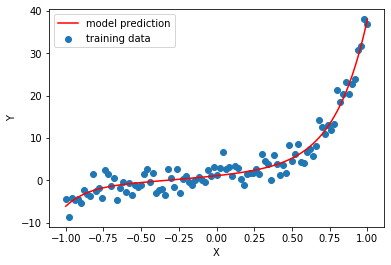

In [17]:
plt.scatter(x_train, y_train,label="training data")
plt.plot(x_train,y_model,'r',label="model prediction")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Regularization

In [18]:
from sklearn.model_selection import train_test_split

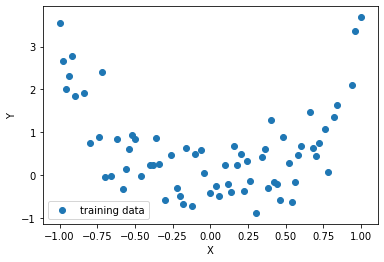

In [19]:
# generate some training data
x_train=np.linspace(-1,1,101)
num_coeff = 8
learning_rate = 0.01
training_epochs = 100
y_train_coeff = np.array([0, 0, 0, 0, 3, 0, 0, 0])

y_kernel = []
for i in range(num_coeff):
    term = np.power(x_train,i)
    y_kernel.append(term)
y_train = np.dot(y_train_coeff, y_kernel) + np.random.randn(*x_train.shape)*0.5   

x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, train_size = 0.7)

# plot training data
plt.scatter(x_train,y_train,label="training data")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [20]:
# define placeholders, variables
X = tf.placeholder(tf.float64)
Y = tf.placeholder(tf.float64)
w = tf.Variable([0.]*num_coeff, name="weights", dtype=tf.float64)
reg_lambda = 0

In [21]:
# model tf object and cost function
y_pred=polyReg(X,w)
cost=(tf.reduce_sum(tf.pow(Y-y_pred,2))+reg_lambda*tf.reduce_sum(tf.square(w)))/2/x_train.size
trainer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [22]:
# run session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())  # initialize variables
    final_cost = []
    w_vals= {}
    for reg_lambda in np.linspace(0.0,1.0,50):
        for _ in range(training_epochs):
            sess.run(trainer,feed_dict={X:x_train,Y:y_train})
            w_val=sess.run(w)
        #print(w_val, reg_lambda)
        w_vals[reg_lambda]=w_val
        final_cost.append(sess.run(cost,feed_dict={X:x_test,Y:y_test}))
    #y_model=sess.run(polyReg(x_train,sess.run(w)))
    sess.close()

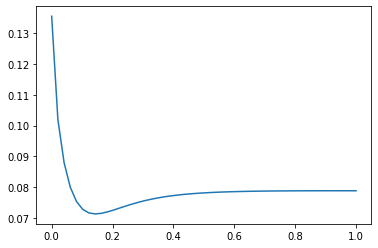

In [23]:
plt.plot(np.linspace(0.0,1.,50),final_cost)

In [24]:
minpos = final_cost.index(min(final_cost))
reg_lambda = np.linspace(0.0,1.,50)
reg_lambda[minpos]

0.14285714285714285

In [25]:
# predict
y_kernel = []
for i in range(num_coeff):
    term = np.power(x_train,i)
    y_kernel.append(term)
y_model = np.dot(w_vals[reg_lambda[minpos]], y_kernel)
y_model.shape

(70,)

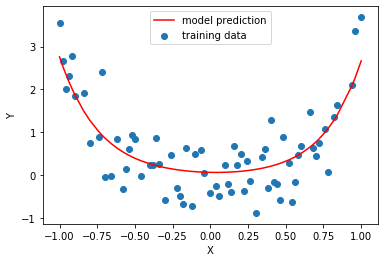

In [26]:
plt.scatter(x_train, y_train,label="training data")
plt.plot(sorted(x_train),y_model[np.argsort(x_train)],'r',label="model prediction")
plt.legend()
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Trial

Can regularization *hyper*paramenter $\lambda$ be obtained by considering it as a parameter?

In [27]:
# define placeholders, variables

X = tf.placeholder(tf.float64)
Y = tf.placeholder(tf.float64)
w = tf.Variable([0.]*num_coeff, name="weights", dtype=tf.float64)
reg_lambda = tf.Variable(0., name="regularization", dtype=tf.float64)

# model tf object and cost function
y_pred=polyReg(X,w)
cost=(tf.reduce_sum(tf.pow(Y-y_pred,2))+reg_lambda*tf.reduce_sum(tf.square(w)))/2/x_train.size
trainer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# run session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())  # initialize variables
    final_cost = []
    w_vals= {}
    reg_lam = []
    for _ in range(training_epochs):
        sess.run(trainer,feed_dict={X:x_train,Y:y_train})
        w_val=sess.run(w)
        lam_val = sess.run(reg_lambda)
        #print(w_val, reg_lambda)
        reg_lam.append(lam_val)
        final_cost.append(sess.run(cost,feed_dict={X:x_test,Y:y_test}))
    #y_model=sess.run(polyReg(x_train,sess.run(w)))
    sess.close()

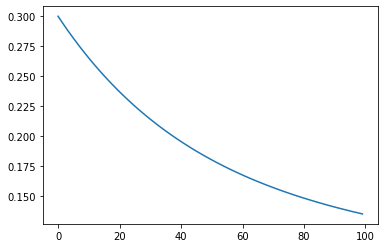

In [28]:
plt.plot(range(training_epochs),final_cost)

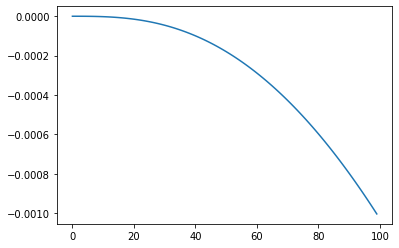

In [29]:
plt.plot(range(training_epochs),reg_lam)

It results in negative values! :(